# 1. Exploratory Data Analysis of Hebarman Survival Data Set

# Description:- 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the university of chicago's billings hospital on survival of patients who had undergone surgery for breast cancer

# Attributes/Features Information :-   (from kaggle)
    
1. There are 4 features including class label/dependent variable. 
2. 30 - It represents age of patient at the time of operation(numerical) 
3. 64 - It represents year of operation(numerical) 
4. 1 - It tells no of +ve auxillry node detected(numerical) 
5. 1.1 - Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


In [4]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Data source :- https://www.kaggle.com/gilsousa/habermans-survival-data-set
# Read the dataset using pandas library
haber = pd.read_csv("haberman.csv")

# (1.1)  High Level Statistics of Dataset

In [8]:
#how many rows and columns?
haber.shape

(305, 4)

In [9]:
#Top 5 rows and all columns
haber.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# observations :- 
    
1. Haberman dataset contains 305 rows and 4 columns
2. From above we can see that, columns are not having names
3. From kaggle adding the names of columns

In [34]:
#naming the columns 
print(haber.columns)
haber.columns = ["age","operation_year","axil_nodes","survival_status"]
print(haber.head())

Index(['age', 'opertion_year', 'axil_nodes', 'survival_status'], dtype='object')
   age  operation_year  axil_nodes  survival_status
0   30              62           3                1
1   30              65           0                1
2   31              59           2                1
3   31              65           4                1
4   33              58          10                1


# observations:- 
    
1. First column contains age of patients 
2. Second column contains opeartion year of patients 
3. Third column contains number of  axil nodes, which are responsible for cancer
4. Fourth coulmn contains :-

    1 = person survived after 5 years,
    
    2 = person died befor 5 years

In [35]:
haber.describe()

,age,operation_year,axil_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [36]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                305 non-null int64
operation_year     305 non-null int64
axil_nodes         305 non-null int64
survival_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [37]:
haber["survival_status"].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

# observations:-
    1. clearly knowing that, haberman dataset is unbalanced dataset
       224:- people lived after 5 years
        81:- people dead before 5 years

# (1.2) Objective :- 

Our objective is to predict whether the patient will survive after 5 years or not based on this 4 features (age , operation_year, axil_nodes, survival_status)

# BI-VARIATE ANALYSIS

# (1.3)  2-D Scatter Plot

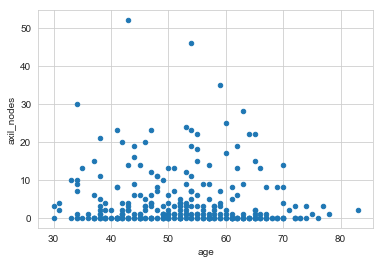

In [38]:
#scatterplot
haber.plot(kind ="scatter", x ="age",y ="axil_nodes")

# observation:-
     
     Maximum number of people are having zero axil_nodes

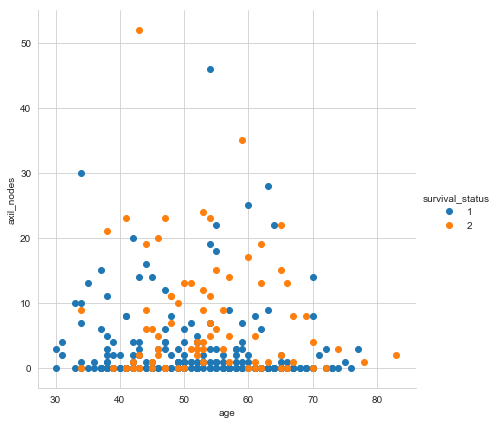

In [39]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid")
sns.FacetGrid(haber,hue="survival_status",height=6)\
   .map(plt.scatter,"age","axil_nodes")\
   .add_legend()
plt.show()

# observations:-
    1.it is difficult to classify orange and blue points
    2.But mostly people lies on zero axil_nodes
    3.From this 2-d sactterplot we cannot make take decision , because it is not clearly classified
    4.For good analysis of data , pair plots are used

#  3-D Satter plot

# (1.4)  Pair Plot

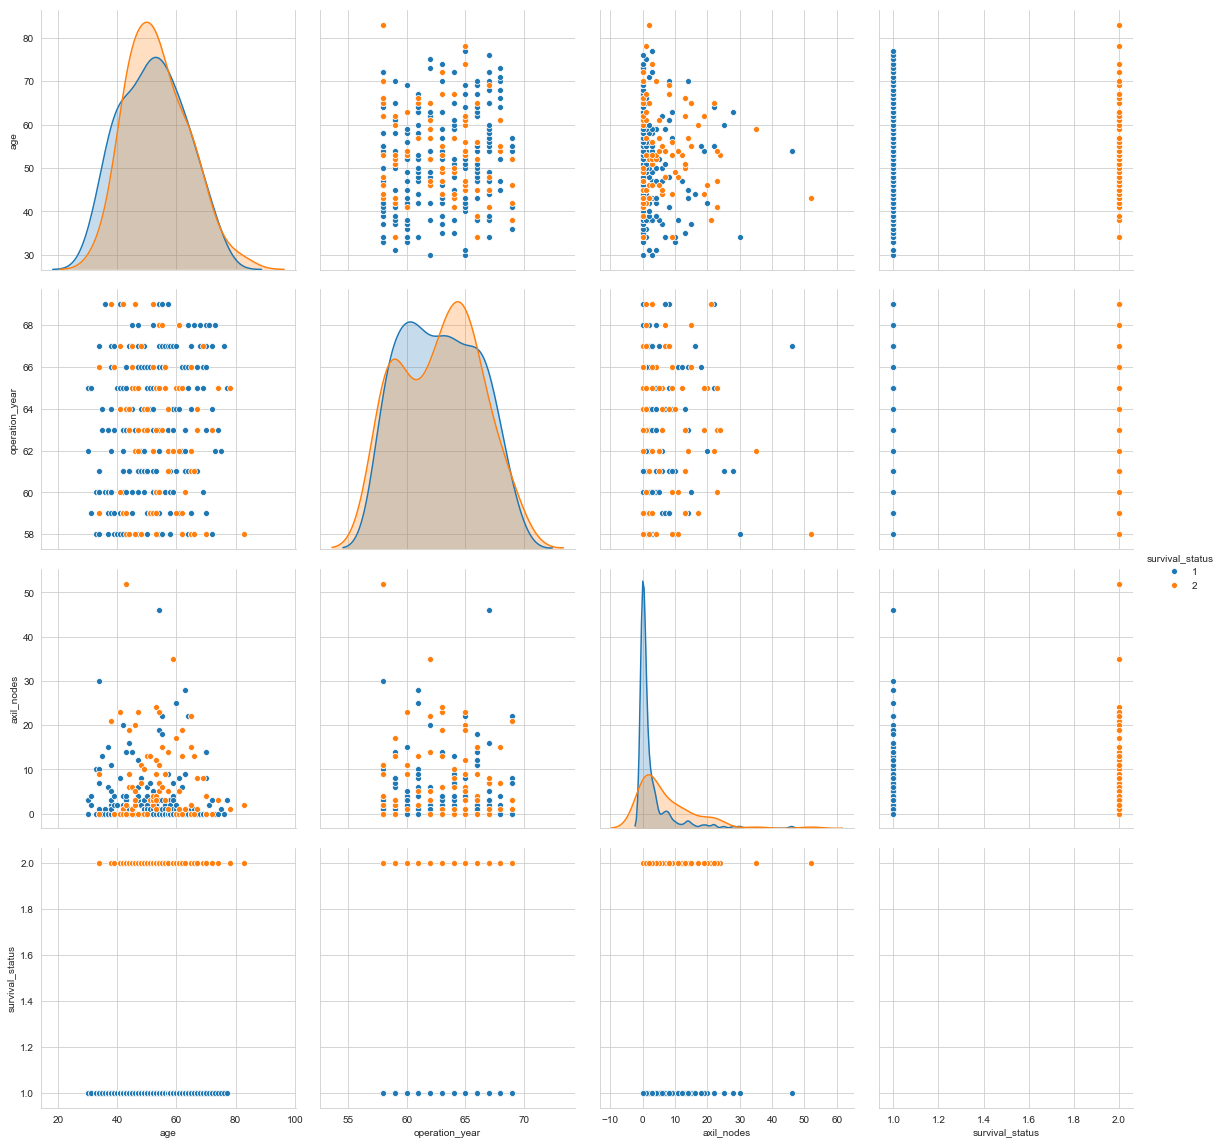

In [40]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber,hue ="survival_status",height=4)
plt.show()

# observation:-
    1. By scattering the data points between axil_nodes and age,we can see the better seperation between the two 
    clases than other scatter plots
    2. Remaining plots are extremely overlapped

# UNIVARIATE ANALYSIS

# (1.5) Histogram,PDF,CDF

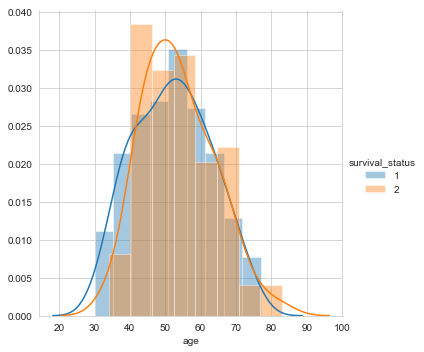

In [44]:
sns.FacetGrid(haber,hue="survival_status",height=5)\
   .map(sns.distplot,"age")\
   .add_legend()
plt.show()

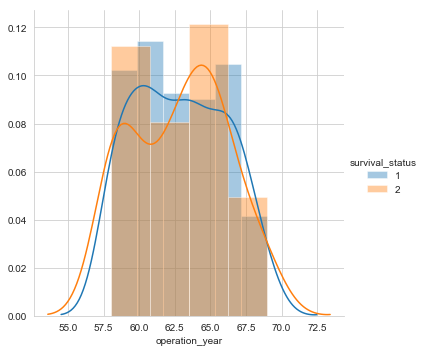

In [45]:
sns.FacetGrid(haber,hue="survival_status",height=5)\
   .map(sns.distplot,"operation_year")\
   .add_legend()
plt.show()

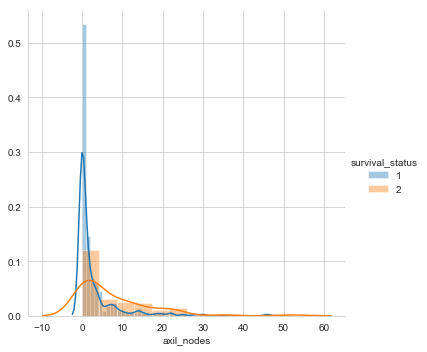

In [46]:
sns.FacetGrid(haber,hue="survival_status",height=5)\
   .map(sns.distplot,"axil_nodes")\
   .add_legend()
plt.show()

# observations:-
    1.From pdfs of this "age vs survival_status" and  "operation_year vs survival_status" plots we cannot classify , because
     it is overlapped more
    2.From pdf of "axil_nodes vs survival_status"  as there is difference between the distributions for both classes.
     From that distribution we can infer that most survival patients have fallen in to zero axil_nodes.

# CDF

In [54]:
#dividing the dataset according to survial_status
#in survival_status dataset have two classes 1,2
#consider survival_status aliveafter5= 1, deadbefore5 =2
alive_after5= haber.loc[haber["survival_status"]==1]
dead_before5 = haber.loc[haber["survival_status"]==2]

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


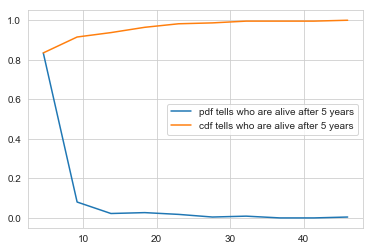

In [58]:
counts,bin_edges = np.histogram(alive_after5["axil_nodes"],bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(["pdf tells who are alive after 5 years","cdf tells who are alive after 5 years"])
plt.show()


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


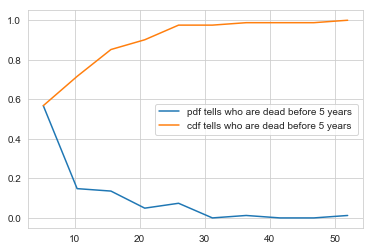

In [59]:
counts,bin_edges = np.histogram(dead_before5["axil_nodes"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:,],cdf)
plt.legend(["pdf tells who are dead before 5 years","cdf tells who are dead before 5 years "])
plt.show()


# (1.6) Mean, Variance and Std-dev

In [88]:
#Mean, Variance, Std-deviation
print("Mean for alive_after5:")
print(np.mean(alive_after5["age"]))
print(np.mean(alive_after5["axil_nodes"]))
print(np.mean(alive_after5["operation_year"]))
 
print("\n Mean for dead_before5:")
print(np.mean(dead_before5["age"]))
print(np.mean(dead_before5["axil_nodes"]))
print(np.mean(dead_before5["operation_year"]))

#std_deviation
print("\nstd_deviation for alive_after5:")
print(np.std(alive_after5["age"]))
print(np.std(alive_after5["axil_nodes"]))
print(np.std(alive_after5["operation_year"]))

print("\n std_dead_before5:")
print("std_deviation for alive_after5")
print(np.std(dead_before5["age"]))
print(np.std(dead_before5["axil_nodes"]))
print(np.std(dead_before5["operation_year"]))
  
#variance
print("\nvariance for alive_after5:")
print(np.var(alive_after5["age"]))
print(np.var(alive_after5["axil_nodes"]))
print(np.var(alive_after5["operation_year"]))

print("\n variance for dead_before5:")
print(np.var(dead_before5["age"]))
print(np.var(dead_before5["axil_nodes"]))
print(np.var(dead_before5["operation_year"]))


Mean for alive_after5:
52.11607142857143
2.799107142857143
62.857142857142854

 Mean for dead_before5:
53.67901234567901
7.45679012345679
62.82716049382716

std_deviation for alive_after5:
10.913004640364269
5.869092706952767
3.2220145175061514

 std_dead_before5:
std_deviation for alive_after5
10.10418219303131
9.128776076761632
3.3214236255207883

variance for alive_after5:
119.09367028061209
34.44624920280616
10.381377551020398

 variance for dead_before5:
102.09449778997102
83.3345526596555
11.031854900167659


In [71]:
print("overall summary statistics of patients alive after 5 years")
alive_after5.describe()

overall summary statistics of patients alive after 5 years


,age,operation_year,axil_nodes,survival_status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [72]:
print("overall summary statistics of patients dead before 5 years")
dead_before5.describe()

overall summary statistics of patients dead before 5 years


,age,operation_year,axil_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# observations:- 
    1.From both the tables we can observe that almost for all the features the statistics are similar except for axil_nodes.
    2.The mean of axil_nodes is more for people who died within 5 years than people who have survived for more than 5 years

# (1.7) Median, Percentile, Quantile, IQR, MAD

In [87]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(alive_after5["axil_nodes"]))
#Median with outlier
print(np.median(np.append(alive_after5["axil_nodes"],60)))
print(np.median(dead_before5["axil_nodes"]))

print("\nQuantiles:")
print(np.percentile(alive_after5["axil_nodes"],np.arange(0,100,25)))
print(np.percentile(dead_before5["axil_nodes"],np.arange(0,100,25)))

print("\n90th Percentiles:")
print(np.percentile(alive_after5["axil_nodes"],90))
print(np.percentile(dead_before5["axil_nodes"],90))

from statsmodels import robust
print("\n Median Absolute Deviation:")
print(robust.mad(alive_after5["axil_nodes"]))
print(robust.mad(dead_before5["axil_nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

 Median Absolute Deviation:
0.0
5.930408874022408


# 1.8  Box plot and Whiskers

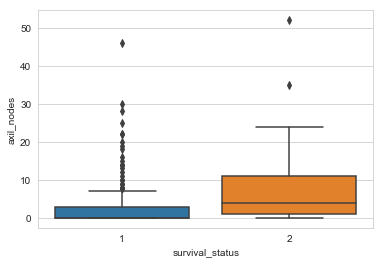

In [79]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x = "survival_status", y = "axil_nodes", data =haber)
plt.show()

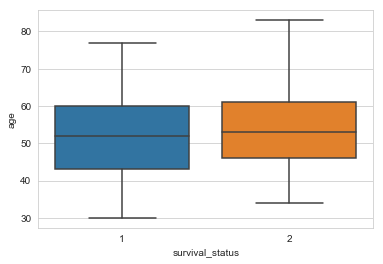

In [80]:
sns.boxplot(x="survival_status",y = "age",data=haber)
plt.show()

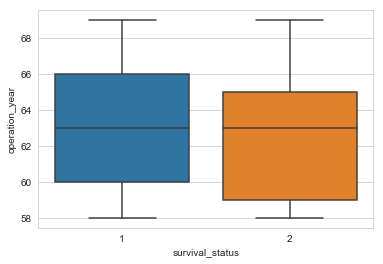

In [82]:
sns.boxplot(x="survival_status",y="operation_year",data=haber)
plt.show()

# 1.9 Violin plots

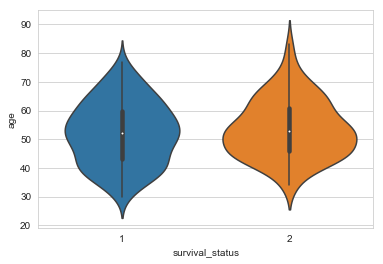

In [84]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="survival_status",y="age", data =haber, size=8)
plt.show()

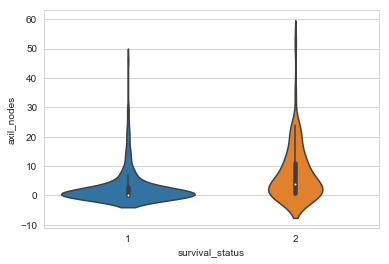

In [85]:
sns.violinplot(x="survival_status",y="axil_nodes",data=haber,size =8)
plt.show()

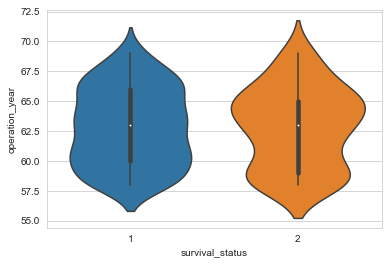

In [86]:
sns.violinplot(x="survival_status", y="operation_year",data=haber,size=8)
plt.show()

# observations:- 
    1.Axil_nodes of survival_status is dense from 0 to 5
    2.More than 5 years 80% of people have less than or equal to 5 axil_nodes
    3. (46-62) age group patients were dead year between 1959 to 1965
    4. (42-60) age group patients are alive year between 1960 to 1966

# Countour Plot

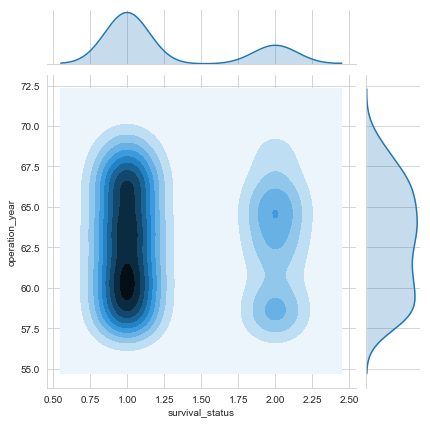

In [89]:
sns.jointplot(x="survival_status",y="operation_year",data=haber,kind="kde")
plt.show()

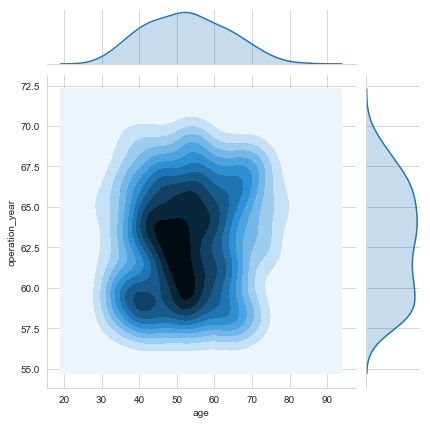

In [90]:
sns.jointplot(x="age",y="operation_year",data=haber,kind="kde")
plt.show()

# conclusions:-
    
1. The given dataset is imbalanced as it does not contain equal number data points means class labels

2. The given dataset is not linearly seperable from each, there is huge overlapping between classlabels so it is difficult to 
   classify.

3. Somehow, axil_nodes vs age  gives some geometrical idea of classification of survival_status

4. we cannot make model using simple if_else conditions, we should use some advance techniques to solve 


# ASSIGNMENT -1  

B MUKUNDA REDDY